In [3]:
from pandas import Series,DataFrame
import pandas as pd
from jqdatasdk import *
from jqdatasdk import finance

#chart part
import chart_studio
import chart_studio.plotly as py
import pandas as pd
import plotly.graph_objects as go #has more control, customizable
import plotly.io as pio #produce an html file
import plotly.express as px #fast, low effort

In [4]:
auth('13618615127', 'JoinQuant220119')

auth success 


In [5]:
# MAC_INDUSTRY_ESTATE_INVEST_MONTH
q = query(macro.MAC_INDUSTRY_ESTATE_INVEST_MONTH)
df_mac_industry_estate_invest_month=macro.run_query(q)
df_mac_industry_estate_invest_month=df_mac_industry_estate_invest_month.sort_values(by="stat_month")

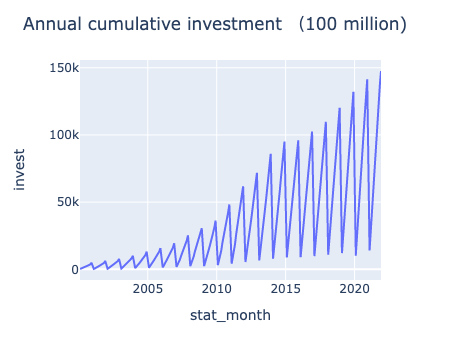

In [19]:
# Annual cumulative investment （100 million）
fig_annual_cumulative_invest = px.line(df_mac_industry_estate_invest_month, x='stat_month', y="invest")
fig_annual_cumulative_invest.update_layout(title = 'Annual cumulative investment （100 million)')
fig_annual_cumulative_invest.show()

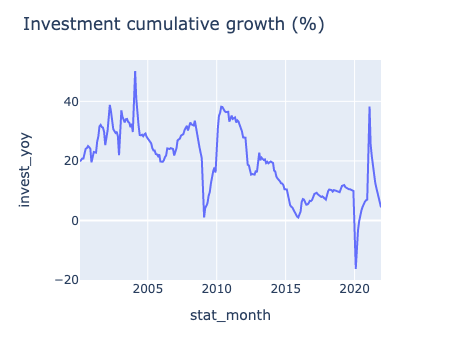

In [7]:
# Real estate investment_cumulative growth (%)
fig_investment_cumulative_growth = px.line(df_mac_industry_estate_invest_month, x='stat_month', y="invest_yoy")
fig_investment_cumulative_growth.update_layout(title = 'Investment cumulative growth (%)')
fig_investment_cumulative_growth.show()

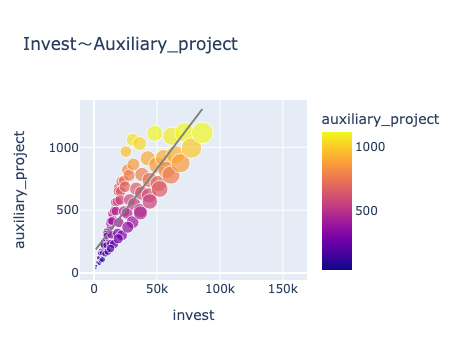

In [8]:
# The relationship between real estate investment and supporting infrastructure investment
fig_invest_luxiliary_project = px.scatter(df_mac_industry_estate_invest_month, x="invest", y="auxiliary_project", title='Invest～Auxiliary_project',
                                         size="invest", color="auxiliary_project", hover_data=['invest'], trendline="ols", trendline_color_override = 'grey')
fig_invest_luxiliary_project.show()


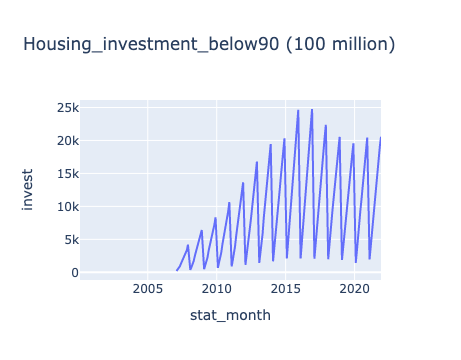

In [9]:
# Housing investment of 90 square meters and below _ Cumulative value (100 million)
fig_Housing_investment_below90 = px.line(df_mac_industry_estate_invest_month, x='stat_month', y="below90_house",
                                        title='Housing_investment_below90 (100 million)')
fig_Housing_investment_below90.update_layout(yaxis_title = 'invest')
fig_Housing_investment_below90.show()

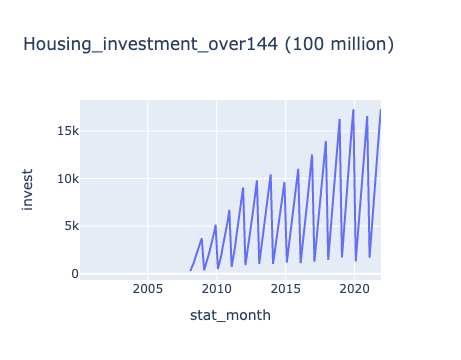

In [10]:
# Investment in housing over 144 square meters _ Cumulative value (100 million)
fig_Housing_investment_over144 = px.line(df_mac_industry_estate_invest_month, x='stat_month', y="above144_house",
                                        title='Housing_investment_over144 (100 million)')
fig_Housing_investment_over144.update_layout(yaxis_title = 'invest')
fig_Housing_investment_over144.show()

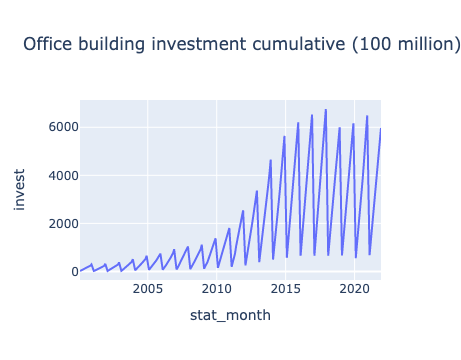

In [11]:
# Real estate office building investment_cumulative value (100 million)
fig_office_building_investment_cumulative = px.line(df_mac_industry_estate_invest_month, x='stat_month', y="office",
                                        title='Office building investment cumulative (100 million)')
fig_office_building_investment_cumulative.update_layout(yaxis_title = 'invest')
fig_office_building_investment_cumulative.show()

In [12]:
# MAC_INDUSTRY_AREA_ESTATE_INVEST_MONTH
q = query(macro.MAC_INDUSTRY_AREA_ESTATE_INVEST_MONTH)
df_mac_industry_area_estate_invest_month = macro.run_query(q)
df_mac_industry_area_estate_invest_month = df_mac_industry_area_estate_invest_month.sort_values(by="stat_month")
df_mac_industry_area_estate_invest_month.to_csv('df_mac_industry_area_estate_invest_month.csv')

# extract Hunan & Beijing
df_area_Hunan=df_mac_industry_area_estate_invest_month.loc[df_mac_industry_area_estate_invest_month.area_name=='湖南省']

df_area_Beijing=df_mac_industry_area_estate_invest_month.loc[df_mac_industry_area_estate_invest_month.area_name=='北京市']

# consolidate Hunan & Beijing
df_area_compare=pd.merge(df_area_Hunan[['stat_month','invest']],
                         df_area_Beijing[['stat_month','invest']],on='stat_month')

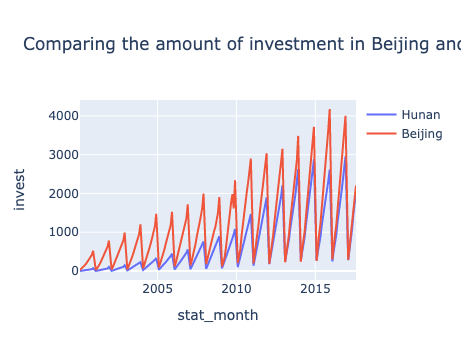

In [13]:
# Modify the column name, only keep invest column
df_area_compare.columns = ['stat_month','invest_Hunan','invest_Beijing']

#I'm using lines as the mode in go.scatter: this gives me a line chart
fig_HB = go.Figure() 
fig_HB.add_trace(go.Scatter(x=df_area_compare['stat_month'], y=df_area_compare["invest_Hunan"],
                    mode='lines',
                    name='Hunan'))

fig_HB.add_trace(go.Scatter(x=df_area_compare['stat_month'], y=df_area_compare["invest_Beijing"],
                    mode='lines',
                    name='Beijing'))
fig_HB.update_layout(title = 'Comparing the amount of investment in Beijing and Hunan', 
                     xaxis_title = 'stat_month', yaxis_title = 'invest')
fig_HB.show()

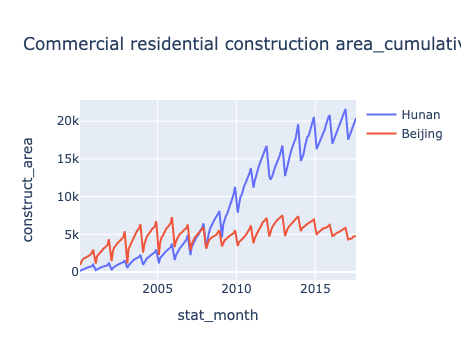

In [14]:
# MAC_INDUSTRY_AREA_ESTATE_BUILD_MONTH
q = query(macro.MAC_INDUSTRY_AREA_ESTATE_BUILD_MONTH)
df_area_build = macro.run_query(q)
df_area_build=df_area_build.sort_values(by="stat_month")

# comparing Beijing and Hunan
df_area_build_Hunan=df_area_build.loc[df_area_build.area_name=='湖南省']
df_area_build_Beijing=df_area_build.loc[df_area_build.area_name=='北京市']

# merge Beijing and Hunan
df_area_compare=pd.merge(df_area_build_Hunan[['stat_month','resident_construct_area']],
                         df_area_build_Beijing[['stat_month','resident_construct_area']],on='stat_month')

# Modify the column, Commercial residential construction area_cumulative value (10,000 square meters)
df_area_compare.columns = ['stat_month','resident_construct_area_Hunan','resident_construct_area_Beijing']

#I'm using lines as the mode in go.scatter: this gives me a line chart
fig_HB = go.Figure() 
fig_HB.add_trace(go.Scatter(x=df_area_compare['stat_month'], y=df_area_compare["resident_construct_area_Hunan"],
                    mode='lines',
                    name='Hunan'))

fig_HB.add_trace(go.Scatter(x=df_area_compare['stat_month'], y=df_area_compare["resident_construct_area_Beijing"],
                    mode='lines',
                    name='Beijing'))
fig_HB.update_layout(title = 'Commercial residential construction area_cumulative (10,000 square meters)', 
                     xaxis_title = 'stat_month', yaxis_title = 'construct_area')

fig_HB.show()


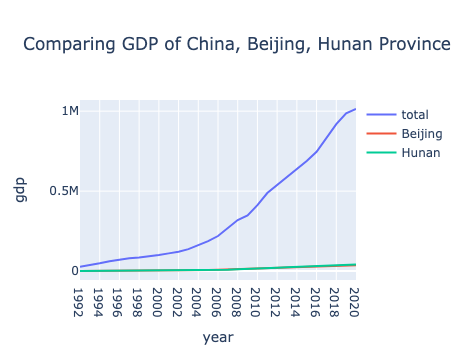

In [15]:
# Gross Domestic Product by Region (Annual)
q = query(macro.MAC_AREA_GDP_YEAR)
df_gdp = macro.run_query(q)
df_gdp=df_gdp.sort_values(by="stat_year")

# compare China, Beijing, Hunan province
df_gdp_total=df_gdp.loc[df_gdp.area_name=='中国']
df_gdp_Beijing=df_gdp.loc[df_gdp.area_name=='北京市']
df_gdp_Hunan=df_gdp.loc[df_gdp.area_name=='湖南省']

# merge China, Beijing, Hunan province
df_gdp_compare=pd.merge(df_gdp_total[['stat_year','gdp']],
                      df_gdp_Beijing[['stat_year','gdp']],
                      on='stat_year')

df_gdp_compare.columns = ['stat_year','gdp_total','gdp_Beijing']

df_gdp_compare=pd.merge(df_gdp_compare[['stat_year','gdp_total','gdp_Beijing']],
                      df_gdp_Hunan[['stat_year','gdp']],on='stat_year')

df_gdp_compare.columns = ['stat_year','gdp_total','gdp_Beijing','gdp_Hunan']

#I'm using lines as the mode in go.scatter: this gives me a line chart
fig_gdp = go.Figure() 
fig_gdp.add_trace(go.Scatter(x=df_gdp_compare['stat_year'], y=df_gdp_compare["gdp_total"],
                    mode='lines',
                    name='total'))

fig_gdp.add_trace(go.Scatter(x=df_gdp_compare['stat_year'], y=df_gdp_compare["gdp_Beijing"],
                    mode='lines',
                    name='Beijing'))

fig_gdp.add_trace(go.Scatter(x=df_gdp_compare['stat_year'], y=df_gdp_compare["gdp_Hunan"],
                    mode='lines',
                    name='Hunan'))
fig_gdp.update_layout(title = 'Comparing GDP of China, Beijing, Hunan Province', 
                     xaxis_title = 'year', yaxis_title = 'gdp')

fig_gdp.show()

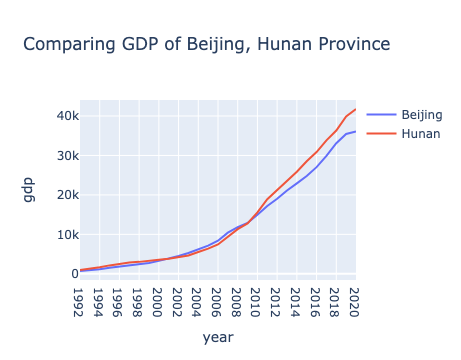

In [16]:
fig_gdp = go.Figure() 
fig_gdp.add_trace(go.Scatter(x=df_gdp_compare['stat_year'], y=df_gdp_compare["gdp_Beijing"],
                    mode='lines',
                    name='Beijing'))

fig_gdp.add_trace(go.Scatter(x=df_gdp_compare['stat_year'], y=df_gdp_compare["gdp_Hunan"],
                    mode='lines',
                    name='Hunan'))
fig_gdp.update_layout(title = 'Comparing GDP of Beijing, Hunan Province', 
                     xaxis_title = 'year', yaxis_title = 'gdp')
fig_gdp.show()


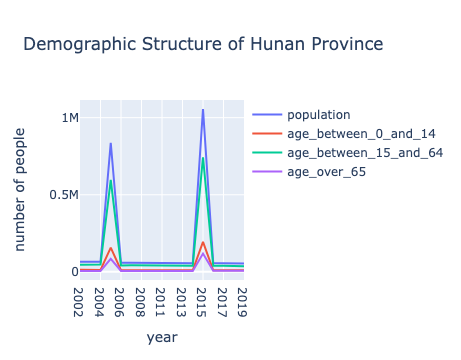

In [17]:
# Demographic Structure of Hunan Province
q = query(macro.MAC_AREA_POP_DEPENDENCY)
df_ps= macro.run_query(q)
df_ps=df_ps.sort_values(by="stat_year")
df_ps_Hunan=df_ps[(df_ps['area_name'] == '湖南省')]

fig_ps = go.Figure() 
fig_ps.add_trace(go.Scatter(x=df_ps_Hunan['stat_year'], y=df_ps_Hunan["population"],
                    mode='lines',
                    name='population'))

fig_ps.add_trace(go.Scatter(x=df_ps_Hunan['stat_year'], y=df_ps_Hunan["age_between_0_and_14"],
                    mode='lines',
                    name='age_between_0_and_14'))

fig_ps.add_trace(go.Scatter(x=df_ps_Hunan['stat_year'], y=df_ps_Hunan["age_between_15_and_64"],
                    mode='lines',
                    name='age_between_15_and_64'))

fig_ps.add_trace(go.Scatter(x=df_ps_Hunan['stat_year'], y=df_ps_Hunan["age_over_65"],
                    mode='lines',
                    name='age_over_65'))
fig_ps.update_layout(title = 'Demographic Structure of Hunan Province', 
                     xaxis_title = 'year', yaxis_title = 'number of people')
fig_ps.show()

In [18]:
# Beijing's population structure
q = query(macro.MAC_AREA_POP_DEPENDENCY)
df_ps= macro.run_query(q)
df_ps=df_ps.sort_values(by="stat_year")
df_ps_Beijing=df_ps[(df_ps['area_name'] == '北京市')]

fig_ps = go.Figure() 
fig_ps.add_trace(go.Scatter(x=df_ps_Beijing['stat_year'], y=df_ps_Beijing["population"],
                    mode='lines',
                    name='population'))

fig_ps.add_trace(go.Scatter(x=df_ps_Beijing['stat_year'], y=df_ps_Beijing["age_between_0_and_14"],
                    mode='lines',
                    name='age_between_0_and_14'))

fig_ps.add_trace(go.Scatter(x=df_ps_Beijing['stat_year'], y=df_ps_Beijing["age_between_15_and_64"],
                    mode='lines',
                    name='age_between_15_and_64'))

fig_ps.add_trace(go.Scatter(x=df_ps_Beijing['stat_year'], y=df_ps_Beijing["age_over_65"],
                    mode='lines',
                    name='age_over_65'))
fig_ps.update_layout(title = 'The population structure of Beijing', 
                     xaxis_title = 'year', yaxis_title = 'number of people')
fig_ps.show()